# Rainfall Trends in India Analysis

In this analysis, we aim to uncover long-term trends, seasonal patterns, and anomalies in India's rainfall data.We will examine historical rainfall trends, detect years with extreme or deficient rainfall, explore relationships between seasonal and annual rainfall and forecast future rainfall using time series models.
For this analysis, we rely on a dataset containing monthly, seasonal and annual rainfall measurements spanning over a century. We have an ideal dataset which includes monthly rainfall values, seasonal aggregations and annual totals which are essentials for understanding variablility, detecting anomalies and predicting future trends.

# Rainfall Trends in India Analysis with Python

Now, we have dataset, which contains rainfall data for India from 1901 to 2015. Each record provides monthly, seasonal and annual rainfall measurements.
This data is critical for understanding long-term trends, seasonal variations and extreme weather events:

In [39]:
import pandas as pd
rainfall_data = pd.read_csv('D:\\rainfall_India_1901-2015.csv')

In [41]:
print(rainfall_data.head())

  REGION  YEAR   JAN   FEB   MAR   APR   MAY    JUN    JUL    AUG    SEP  \
0  INDIA  1901  34.7  37.7  18.0  39.3  50.8  113.4  242.2  272.9  124.4   
1  INDIA  1902   7.4   4.3  19.0  43.5  48.3  108.8  284.0  199.7  201.5   
2  INDIA  1903  17.0   8.3  31.3  17.1  59.5  118.3  297.0  270.4  199.1   
3  INDIA  1904  14.4   9.6  31.8  33.1  72.4  164.8  261.0  206.4  129.6   
4  INDIA  1905  25.3  20.9  42.7  33.7  55.7   93.3  252.8  200.8  178.4   

     OCT   NOV   DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  
0   52.7  38.0   8.3  1032.3     72.4    108.1    752.8     99.0  
1   61.5  27.9  24.4  1030.2     11.7    110.8    794.0    113.8  
2  117.9  36.9  17.7  1190.5     25.3    107.9    884.8    172.5  
3   69.0  11.2  16.3  1019.8     24.0    137.4    761.8     96.6  
4   51.4   9.7  10.5   975.3     46.2    132.2    725.4     71.6  


# Analyzing Annual Rainfall Trends Over Time

We will plot three plots:



1.   We will plot annual rainfall over time and compare it with the overall mean. This helps identify whether there is a noticeable long-term trend, such as an increase or decrease in rainfall over the years.
2.   We will calculate the average rainfall for each month across all years. And by plotting a bar chart, we can identify the months with the highest and lowest average rainfall.
3. Next, we will analyze seasonal rainfall by aggregating rainfall data into four seasons: Jan-Feb, Mar-May, Jun-Sep and Oct-Dec.






Let's visualize these plots to get started with rainfall trends in India analysis:

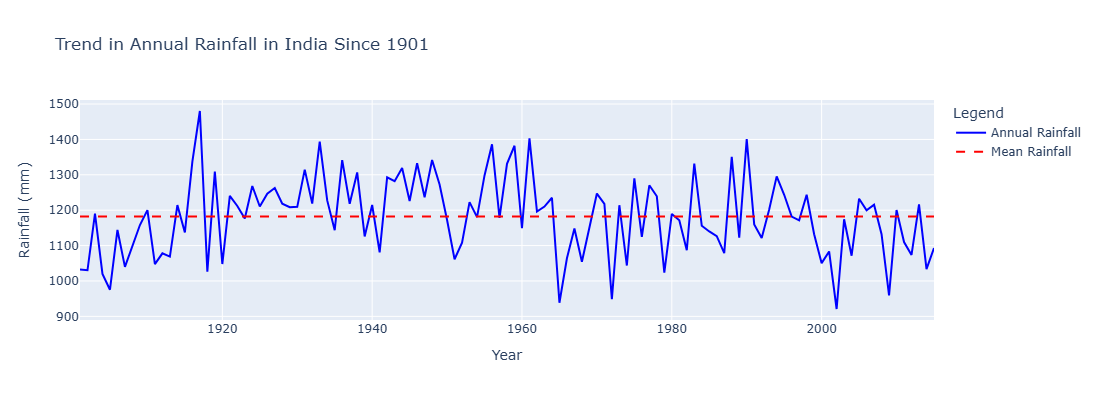

In [46]:
import plotly.graph_objects as go
import plotly.express as px

# analyze trends in annual rainfall over time
annual_rainfall = rainfall_data[['YEAR','ANNUAL']]

fig_annual = go.Figure()
fig_annual.add_trace(go.Scatter(x=annual_rainfall['YEAR'],
                                y=annual_rainfall['ANNUAL'],
                                mode='lines',
                                name='Annual Rainfall',
                                line=dict(color='blue', width=2)))

fig_annual.add_trace(go.Scatter(
    x=annual_rainfall['YEAR'],
    y=[annual_rainfall['ANNUAL'].mean()]*len(annual_rainfall['YEAR']),
    mode='lines',
    name='Mean Rainfall',
    line = dict(color='red',dash='dash')
))

fig_annual.update_layout(
    title='Trend in Annual Rainfall in India Since 1901',
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    legend=dict(title='Legend'),
    height = 400,
    width = 700
)

fig_annual.show()

The above graph shows significant year to year variability in India's annual rainfall, with no apparent long-term upward or downward trend over the century. The red dashed line indicates the mean rainfall, around which the annual rainfall oscillates. Notable peaks and throughs highlight extreme rainfall events and dry years.

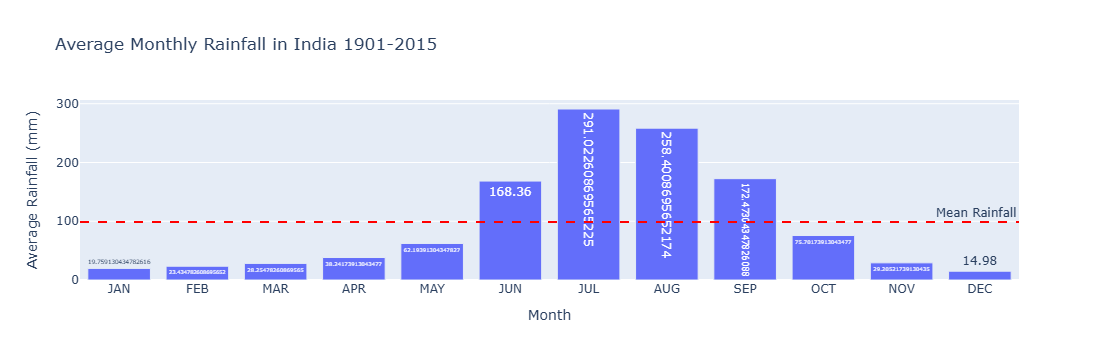

In [49]:
# identify months with the highest and lowest rainfall on average
monthly_cols = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
monthly_avg = rainfall_data[monthly_cols].mean()

highest_rainfall_month = monthly_avg.idxmax()
lowest_rainfall_month = monthly_avg.idxmin()

fig_monthly = px.bar(
    x=monthly_avg.index,
    y=monthly_avg.values,
    labels= {'x':'Month','y':'Average Rainfall (mm)'},
    title="Average Monthly Rainfall in India 1901-2015",
    text=monthly_avg.values
)

fig_monthly.add_hline(
    y=monthly_avg.mean(),
    line_dash='dash',
    line_color='red',
    annotation_text='Mean Rainfall',
    annotation_position='top right'
)

fig_monthly.update_traces(marker_color='sky blue', marker_line_width=1)
fig_monthly.show()

The Bar chart illustrates a highly uneven distribution of rainfall across months, with July and August the highest average rainfall. The red dashed line represents the mean monthly rainfall, showing that most months receive rainfall below the average, except during the monsoon months (June to September).

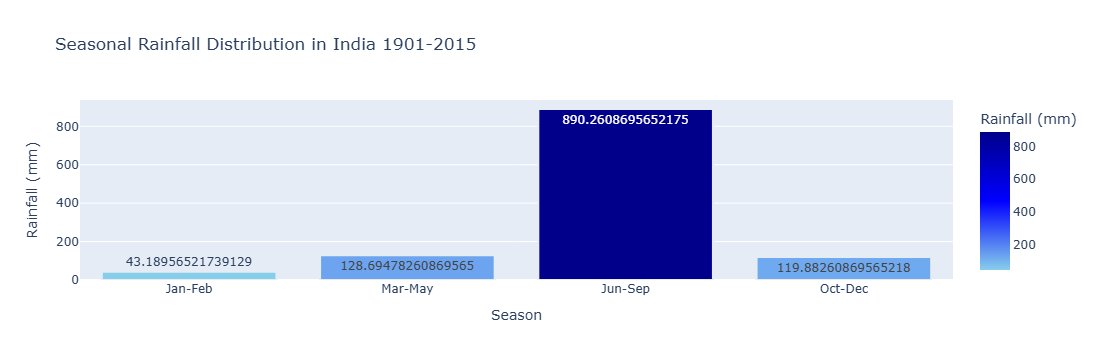

In [52]:
# seasonal rainfall distribution
seasonal_cols = ['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']
seasonal_avg = rainfall_data[seasonal_cols].mean()

fig_seasonal = px.bar(
    x=seasonal_avg.index,
    y=seasonal_avg.values,
    labels={'x':'Season','y':'Rainfall (mm)'},
    title='Seasonal Rainfall Distribution in India 1901-2015',
    text=seasonal_avg.values,
    color=seasonal_avg.values,
    color_continuous_scale=["skyblue",'blue','darkblue']
)

fig_seasonal.update_traces( marker_line_width=2)
fig_seasonal.update_layout(
    coloraxis_colorbar=dict(title='Rainfall (mm)')
)
fig_seasonal.show()

The seasonal distribution highlights the dominance of the monsoon season (June to September), which contributes the bulk of rainfall around 890mm. In contrast, the other seasons (Jan-Feb, Mar-May and Oct-Dec) contribute significantly less to the annual total, which emphasizes the critical role of the monsoon.

# Assessing the Impact of Climate in the Rainfall Trends in India

Now, we will calculate 10-year rolling average of rainfall to identify long-term trends and smooth out short-term variations.
This will help assess the potential impact of climate change on rainfall patterns:

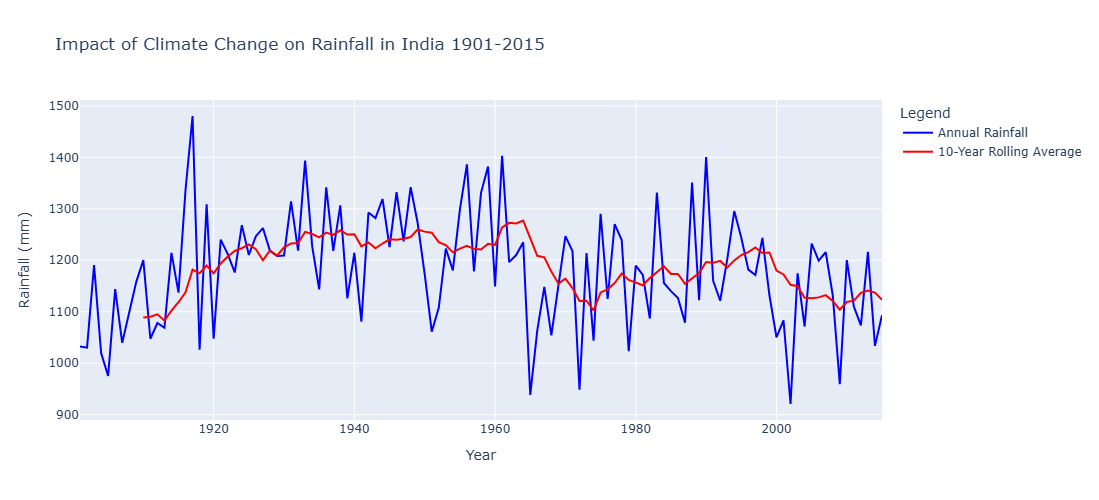

In [57]:
from textwrap import fill
# calculate rolling averages to assess climate change impact
rainfall_data['10-Year Rolling Avg']=rainfall_data['ANNUAL'].rolling(window=10).mean()

fig_climate_change= go.Figure()

fig_climate_change.add_trace(go.Scatter(
    x=rainfall_data['YEAR'],
    y=rainfall_data['ANNUAL'],
    mode='lines',
    name='Annual Rainfall',
    line=dict(color='blue',width=2)
))

fig_climate_change.add_trace(go.Scatter(
    x=rainfall_data['YEAR'],
    y=rainfall_data['10-Year Rolling Avg'],
    mode='lines',
    name='10-Year Rolling Average',
    line=dict(color='red',width=2)
))

fig_climate_change.update_layout(
    title='Impact of Climate Change on Rainfall in India 1901-2015',
    xaxis_title ='Year',
    yaxis_title="Rainfall (mm)",
    legend=dict(title='Legend'),
    height=500,
    width=1000
)
fig_climate_change.show()

This graph shows the annual rainfall trends in India which is blue line and 10-year rolling average means red line to identify long-term patterns. While annual rainfall exhibits significant variability, the 10-tear rolling average indicates a slight downward trend post-1960, which suggests a possible impact of climate change on rainfall distribution. Periods of Higher averages in the early 20th-century contrast with more consistent but lower averages in recent decades.

Now, using statistical thresholds (1.5 standard deviations below or above the mean), let's identify years with extreme or deficient rainfall. This will help to detect drought years and periods of excessive rainfall:

In [61]:
from scipy.stats import pearsonr

# identify drought and extreme rainfall years
mean_rainfall = rainfall_data['ANNUAL'].mean()
std_dev_rainfall = rainfall_data['ANNUAL'].std()

drought_years = rainfall_data[rainfall_data['ANNUAL']<(mean_rainfall-1.5*std_dev_rainfall)]
extreme_rainfall_years = rainfall_data[rainfall_data['ANNUAL'] >(mean_rainfall + 1.5*std_dev_rainfall)]

# correlating seasonal rainfall with annual totals
seasonal_cols = ['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']
seasonal_correlations ={
    season: pearsonr(rainfall_data[season],rainfall_data['ANNUAL'])[0] for season in seasonal_cols

}

# displaying results for drought years and correlations
drought_years_summary = drought_years[['YEAR','ANNUAL']].reset_index(drop=True)
extreme_rainfall_years_summary = extreme_rainfall_years[['YEAR','ANNUAL']].reset_index(drop=True)
seasonal_correlations_summary = pd.DataFrame.from_dict(seasonal_correlations, orient='index',columns=['Correlation'])
print(drought_years_summary)
print(extreme_rainfall_years_summary)
print(seasonal_correlations_summary)

   YEAR  ANNUAL
0  1905   975.3
1  1965   938.4
2  1972   948.5
3  2002   920.8
4  2009   959.3
   YEAR  ANNUAL
0  1917  1480.3
1  1933  1393.5
2  1956  1386.2
3  1959  1382.1
4  1961  1403.0
5  1988  1351.0
6  1990  1400.6
         Correlation
Jan-Feb     0.228913
Mar-May     0.313057
Jun-Sep     0.930027
Oct-Dec     0.531648


The analysis identifies five significant drought years (e.g., 2002 and 2009) and seven extreme rainfall years (e.g., 1917 and 1990) based on deviations from the mean annual rainfall. Seasonal rainfall correlations with annual totals reveal that the monsoon season (June-September) has the strongest correlation (0.93), which indicates it predominantly drives annual rainfall patterns. In contrast, other seasons like January-February (0.23) and March-May (0.31) have weaker correlations, which emphasizes the critical role of the monsoon in India's overall rainfall dynamics.

# Correlating Seasonal Rainfall with Annual Totals

Now, we will calculate the correlation coefficients between seasonal rainfall and annual rainfall totals to understand how much each season contributes to the overall yearly rainfall:

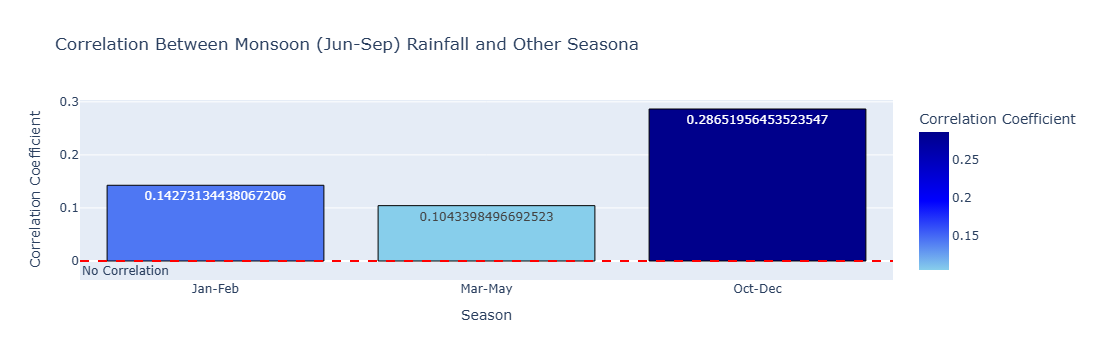

In [66]:
# correlation analysis between monsoon (Jun-Sep) rainfall and other seasons
seasonal_cols = ['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']
monsoon_cols = 'Jun-Sep'
relationships ={}

for season in seasonal_cols:
  if season != monsoon_cols:
    corr, _ = pearsonr(rainfall_data[monsoon_cols],rainfall_data[season])
    relationships[season] = corr

correlation_data = pd.DataFrame({
    'Season': list(relationships.keys()),
    'Correlation Coefficient': list(relationships.values())
})

fig = px.bar(
    correlation_data,
    x='Season',
    y='Correlation Coefficient',
    title='Correlation Between Monsoon (Jun-Sep) Rainfall and Other Seasona',
    labels={'Season':'Season','Correlation Coefficient':'Correlation Coefficient'},
    text='Correlation Coefficient',
    color='Correlation Coefficient',
    color_continuous_scale = ['skyblue','blue','darkblue']
)

fig.add_hline(
    y=0,
    line_dash='dash',
    line_color='red',
    annotation_text ='No Correlation',
    annotation_position ='bottom left'
)

fig.update_traces(marker_line_color='black', marker_line_width=1)


fig.show()

This graph shows the correlation between monsoon rainfall and rainfall during other seasons. The October-December season has the highest correlation (0.29), which suggests a moderate relationship, possibly due to the post-monsoon retreat rains. the January-February (0.14) and March-May (0.10) seasons exhibit weaker correlations, which indicate minimal dependence on monsoon rainfall. This highlights the dominance of monsoonal patterns as an independent driver of India's annual rainfall, with limited spillover effects on other seasons.

# Grouping Years Based on Rainfall Patterns

Now, by applying k-means clustering, we will group years into three categories: **Dry, Normal, Wet** , based on rainfall patterns:

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



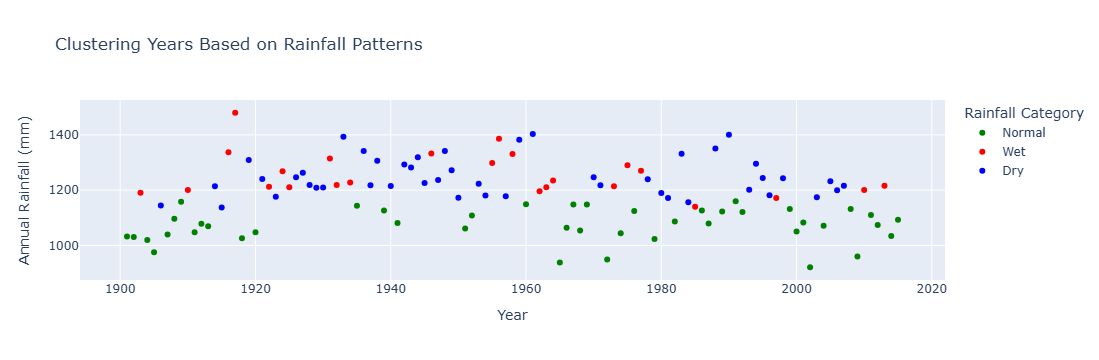

In [71]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# prepare data for clustering
rainfall_features = rainfall_data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(rainfall_features)

# perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
rainfall_data['Rainfall_Cluster'] = kmeans.fit_predict(scaled_features)

# map cluster labels to categories (e.g., Dry, Normal, Wet)
cluster_labels = {0:'Dry',1:'Normal',2:'Wet'}
rainfall_data['Rainfall_Category'] = rainfall_data['Rainfall_Cluster'].map(cluster_labels)

fig = px.scatter(
    rainfall_data,
    x='YEAR',
    y='ANNUAL',
    color='Rainfall_Category',
    title='Clustering Years Based on Rainfall Patterns',
    labels= {'YEAR':'Year','ANNUAL':'Annual Rainfall (mm)'},
    color_discrete_map={'Dry':'blue','Normal':'green','Wet':'red'},
    hover_data={'Rainfall_Cluster':True,'Rainfall_Category':True}
)

fig.update_layout(
    legend_title='Rainfall Category'
)

fig.show()

The clusters reveal that most years fall into the Normal category, while Wet years (above-normal rainfall) are sporadically distributed throughout the timeline, with a concentration in the early and mid-20th century. Dry years (below-normal rainfall) are more frequent in the latter half of the timeline, which indicates a potential shift in rainfall patterns over time. This clustering emphasizez the variability and potential long-term changes in India's rainfall dynamics.

# Forecasting Future Rainfall

Finally, we will use the Prophet library to forecast annual rainfall for the next 20 years:

21:29:58 - cmdstanpy - INFO - Chain [1] start processing
21:29:58 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Admin\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



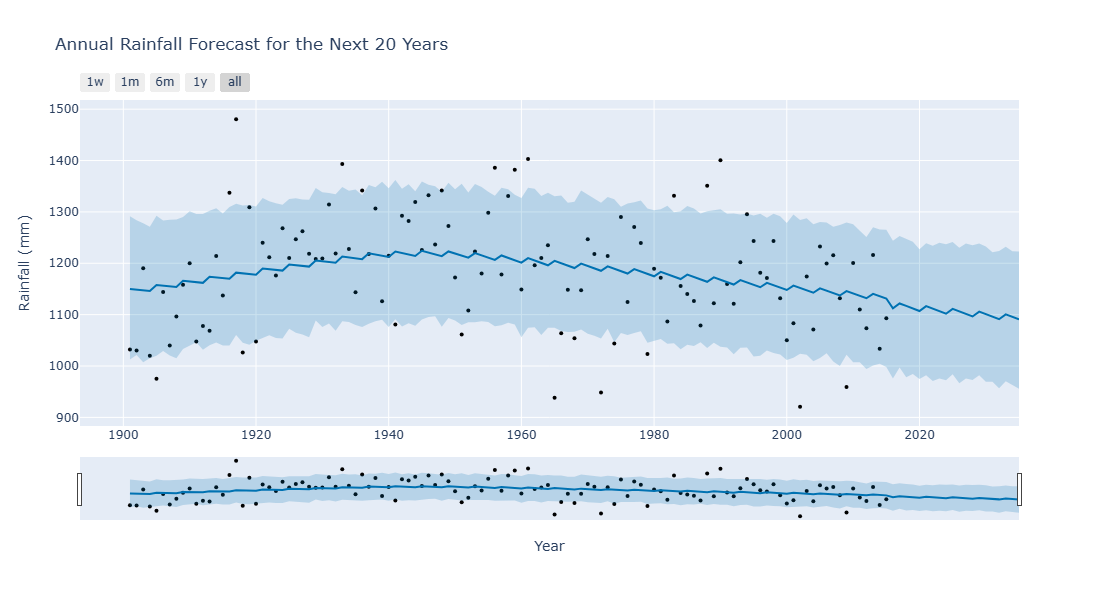

In [76]:
rainfall_data['DATE'] = pd.to_datetime(rainfall_data['YEAR'], format='%Y')
annual_rainfall_ts = rainfall_data.set_index('DATE')['ANNUAL']

from prophet import Prophet

# prepare the data for Prophet
prophet_data = annual_rainfall_ts.reset_index()
prophet_data.columns = ['ds','y']

from prophet.plot import plot_plotly, plot_components_plotly

prophet_model = Prophet()
prophet_model.fit(prophet_data)

# create a future dataframe for the next 20 years
future = prophet_model.make_future_dataframe(periods=20,freq='Y')
forecast = prophet_model.predict(future)

fig_forecast = plot_plotly(prophet_model,forecast)

fig_forecast.update_layout(
    title='Annual Rainfall Forecast for the Next 20 Years',
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    width=1000
)
fig_forecast.show()

The blue line represents the model's forecast trend, while the shaded area indicates the confidence interval. The trends reveals a slight decline in annual rainfall over time, with notable year-to-year variability (black dots representing actual data points). The model captures the variability well but highlights that future rainfall may continue to slightly decrease, which emphasizes the need for adaptive strategies to manage potential water resource challenges.

# Conclusion

The analysis of India's rainfall and patterns from 1901 to 2015 reveals significant variability in annual and seasonal rainfall, with the monsoon season (June-September) being the dominant contributor. Clustering shows a shift towards more dry years in recent decades. Correlations indicate the limited dependency of non-monsoon seasons on monsoon rainfall. A time-series forecast using Prophet suggests a slight declining trend in annual rainfall, which emphasises the need for long-term water resource planning and adaptation to changing climate patterns.